<a href="https://colab.research.google.com/github/ibribr/DT8807/blob/master/LeNet5_MNIST_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix

In [2]:
(xtrain, ytrain), (xtest, ytest) = load_data()
xtrain = xtrain.astype('float32') /255.
xtest = xtest.astype('float32') /255.
print(ytrain[10])
ytrain = to_categorical(ytrain)   #one hot encoding
ytest = to_categorical(ytest)
print(ytrain[10])

print('Original Dimensions : ',xtrain.shape)

xtrain = np.expand_dims(xtrain, axis=3)
xtest = np.expand_dims(xtest, axis=3)

print(xtrain.shape)

11501568/11490434 [==============================] - 0s 0us/step
3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Original Dimensions :  (60000, 28, 28)
(60000, 28, 28, 1)


In [3]:
model = Sequential()
model.add(Conv2D(filters=6, kernel_size = 5, strides = 1, activation = 'tanh', input_shape = (28, 28, 1), padding = 'same'))
model.add(AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))
model.add(Conv2D(filters=16, kernel_size = 5, strides = 1, activation = 'tanh', padding = 'valid'))
model.add(AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))
model.add(Conv2D(filters = 120, kernel_size = 5, strides = 1, activation = 'tanh', padding = 'valid'))
model.add(Flatten())
model.add(Dense(units = 84, activation = 'tanh', ))
model.add(Dense(units = 10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
hist = model.fit(xtrain, ytrain, batch_size=32, epochs=20, validation_data=(xtest, ytest), verbose=2, shuffle=True)

Epoch 1/20
1875/1875 - 17s - loss: 0.6044 - accuracy: 0.8424 - val_loss: 0.2926 - val_accuracy: 0.9176 - 17s/epoch - 9ms/step
Epoch 2/20
1875/1875 - 8s - loss: 0.2584 - accuracy: 0.9247 - val_loss: 0.2055 - val_accuracy: 0.9389 - 8s/epoch - 4ms/step
Epoch 3/20
1875/1875 - 8s - loss: 0.1925 - accuracy: 0.9430 - val_loss: 0.1593 - val_accuracy: 0.9538 - 8s/epoch - 4ms/step
Epoch 4/20
1875/1875 - 8s - loss: 0.1506 - accuracy: 0.9547 - val_loss: 0.1267 - val_accuracy: 0.9639 - 8s/epoch - 4ms/step
Epoch 5/20
1875/1875 - 8s - loss: 0.1223 - accuracy: 0.9637 - val_loss: 0.1054 - val_accuracy: 0.9679 - 8s/epoch - 4ms/step
Epoch 6/20
1875/1875 - 8s - loss: 0.1030 - accuracy: 0.9701 - val_loss: 0.0907 - val_accuracy: 0.9721 - 8s/epoch - 4ms/step
Epoch 7/20
1875/1875 - 8s - loss: 0.0892 - accuracy: 0.9740 - val_loss: 0.0819 - val_accuracy: 0.9736 - 8s/epoch - 4ms/step
Epoch 8/20
1875/1875 - 8s - loss: 0.0790 - accuracy: 0.9768 - val_loss: 0.0726 - val_accuracy: 0.9772 - 8s/epoch - 4ms/step
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
0.1095246547833085
Training and validation loss    :  0.1095246547833085 0.0860023370012641
Training and validation accuracy:  0.9687008291482926 0.9738849997520447
313/313 [==============================] - 1s 4ms/step - loss: 0.0392 - accuracy: 0.9877
accuracy : [0.039168670773506165, 0.9876999855041504]


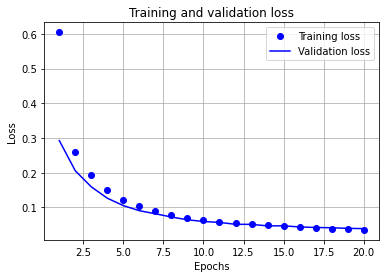

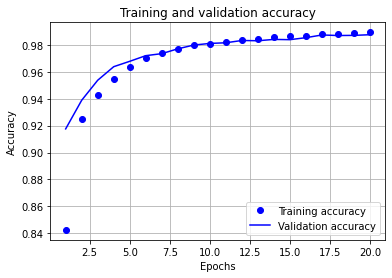

In [9]:
print(hist.history.keys())
loss = hist.history['loss']
print(np.mean(loss))
accuracy = hist.history['accuracy']
val_loss = hist.history['val_loss']
val_accuracy = hist.history['val_accuracy']

print('Training and validation loss    : ', np.mean(loss), np.mean(val_loss))
print('Training and validation accuracy: ', np.mean(accuracy), np.mean(val_accuracy))

ypred = model.predict(xtest)
score = model.evaluate(xtest, ytest)
print('accuracy :', score)

epochs = range(1, len(loss)+1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

Confusion Matrix


<Figure size 432x288 with 0 Axes>

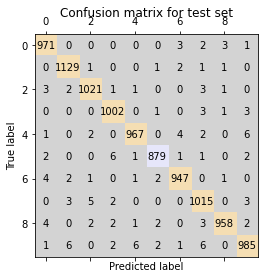

In [ ]:
print('Confusion Matrix')

cmap = ListedColormap(['lightgrey', 'silver', 'ghostwhite', 'lavender', 'wheat'])

cm = confusion_matrix(ytest.argmax(1), ypred.argmax(1))
plt.figure()
plt.matshow(cm, cmap=cmap)

for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    plt.text(x=j, y=i, s=cm[i,j], va='center', ha='center')
  
plt.title('Confusion matrix for test set')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

conv2d
conv2d (5, 5, 1, 6)
average_pooling2d
conv2d_1
conv2d_1 (5, 5, 6, 16)
average_pooling2d_1
conv2d_2
conv2d_2 (5, 5, 16, 120)
flatten
dense
dense_1
conv2d
Filters/kernels: [[ 0.21664658  0.3458335   0.18204084  0.36840224  0.32552743]
 [ 0.36909786  0.23652051  0.19179365 -0.00508444  0.13376027]
 [ 0.03633112 -0.14465208 -0.33280042 -0.00711299 -0.06016668]
 [-0.25060084 -0.47435653 -0.34999716 -0.2893341  -0.08812474]
 [-0.33325782 -0.5034181  -0.4454983  -0.4692649  -0.33553386]]
Biases: [ 0.2836115  -0.1846702   0.0660912   0.46316585  0.47892585 -0.10905631]


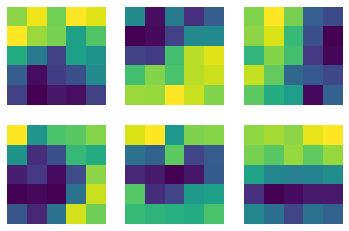

In [24]:
# how to get filter weights and biases
for layer in model.layers:
  print(layer.name)
  if 'conv' not in layer.name:
    continue
  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)

# retrive and display weights of the the filters of second conv layer
print(model.layers[0].name)
filters, biases = model.layers[0].get_weights()
print("Filters/kernels:",filters[:,:,:,0].reshape(5,5))
print("Biases:",biases)

for i in range(6):
  plt.subplot(2,3,1+i)
  plt.imshow(filters[:,:,:,i].reshape(5,5))
  plt.axis('off')
plt.show()